In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset
dataset = pd.read_csv(r"C:\Users\Shriram\Downloads\archive\HousingData.csv")
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Preprocessing to handle missing values
# Replace NaNs with mean of respective columns
dataset.fillna(dataset.mean(), inplace=True)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [4]:
# Split the dataset into features and target
X = dataset.drop(columns=["MEDV"])
y = dataset["MEDV"]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Regression Model
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

# MEAN SQUARED ERROR

In [8]:
# Compile the model
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100

13/13 [==============================] - 3s 50ms/step - loss: 588.3301 - val_loss: 491.2263
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 535.0129 - val_loss: 434.9245
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 467.9689 - val_loss: 360.2229
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 378.4465 - val_loss: 267.7586
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 270.1117 - val_loss: 170.0446
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 165.4497 - val_loss: 93.2901
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 97.1378 - val_loss: 56.0703
Epoch 8/100
13/13 [==============================] - 0s 13ms/step - loss: 65.2162 - val_loss: 43.1835
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 48.7192 - val_loss: 35.9274
Epoch 10/100
13/13 [==============================] - 0s 13ms/step - l

In [13]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

13/13 [==============================] - 0s 4ms/step - loss: 7.8735
Training Loss: 7.8735151290893555
4/4 [==============================] - 0s 8ms/step - loss: 12.1628
Test Loss: 12.162785530090332


In [14]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

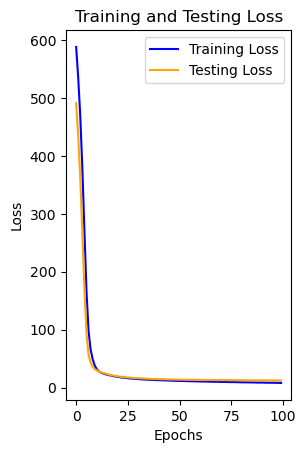

In [16]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

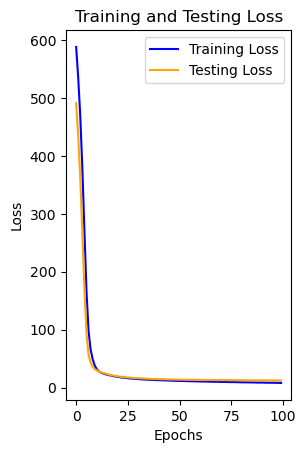

In [17]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# MEAN ABSOLUTE ERROR

In [19]:
# Compile the model with Mean Absolute Error loss metric
regression_model.compile(optimizer='adam', loss='mean_absolute_error')

In [20]:
# Train the model
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 30ms/step - loss: 2.0979 - val_loss: 2.3336
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 2.0586 - val_loss: 2.2572
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 2.0615 - val_loss: 2.2670
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 2.0522 - val_loss: 2.2704
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 2.0178 - val_loss: 2.2667
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 1.9978 - val_loss: 2.2026
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 2.0358 - val_loss: 2.2228
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 2.0144 - val_loss: 2.2893
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 1.9908 - val_loss: 2.2033
Epoch 10/100
13/13 [==============================] - 0s 11ms/step - loss: 1.9550 - val_loss: 2.2719


In [21]:
# Evaluate the model on training set
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

# Evaluate the model on testing set
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

13/13 [==============================] - 0s 3ms/step - loss: 1.4042
Training Loss: 1.4041574001312256
4/4 [==============================] - 0s 4ms/step - loss: 2.2016
Test Loss: 2.2015998363494873


In [22]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

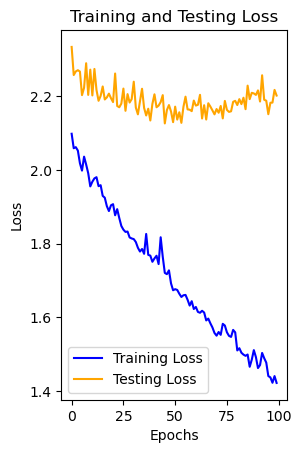

In [23]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>